In [1]:
%matplotlib inline
import requests
from PIL import Image
from io import BytesIO
import cv2
import numpy as np
import os
import sys
import math
import matplotlib.pyplot as plt

In [2]:
# plot setting
rows = 6
columns = 6
plt.rcParams['figure.figsize'] = (18.0, 18.0)
figsize = (8, 8)

## Vehicle Attribute Recognition

In [3]:
# Vehicle Detection Model
vehicle_detection = cv2.dnn.readNet("models/vehicle-detection-adas-0002.bin",
                                   "models/vehicle-detection-adas-0002.xml")
vehicle_detection.setPreferableBackend(cv2.dnn.DNN_BACKEND_INFERENCE_ENGINE)
vehicle_detection.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

# Vehicle Atribute Model
vehicle_attribute = cv2.dnn.readNet("models/vehicle-attributes-recognition-barrier-0039.bin",
                                   "models/vehicle-attributes-recognition-barrier-0039.xml")
vehicle_attribute.setPreferableBackend(cv2.dnn.DNN_BACKEND_INFERENCE_ENGINE)
vehicle_attribute.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

color_label = ["white","gray","yellow","red","green","blue","black"]
type_lablel = ["car","bus","truck","van"]

######  Read in Highway Img

(1, 1, 200, 7)


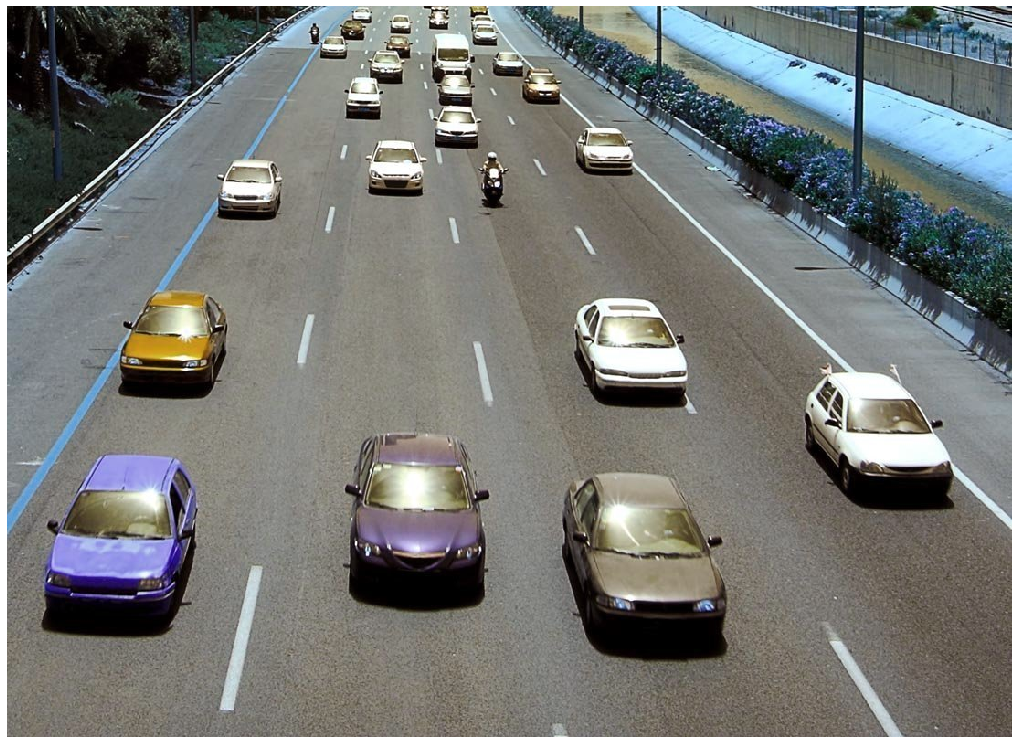

In [4]:
highway = cv2.imread("highway.jpg")
plt.axis("off")
plt.imshow(highway)

VD_blob = cv2.dnn.blobFromImage(highway)
vehicle_detection.setInput(VD_blob)
VD_out = vehicle_detection.forward() 
print(VD_out.shape)

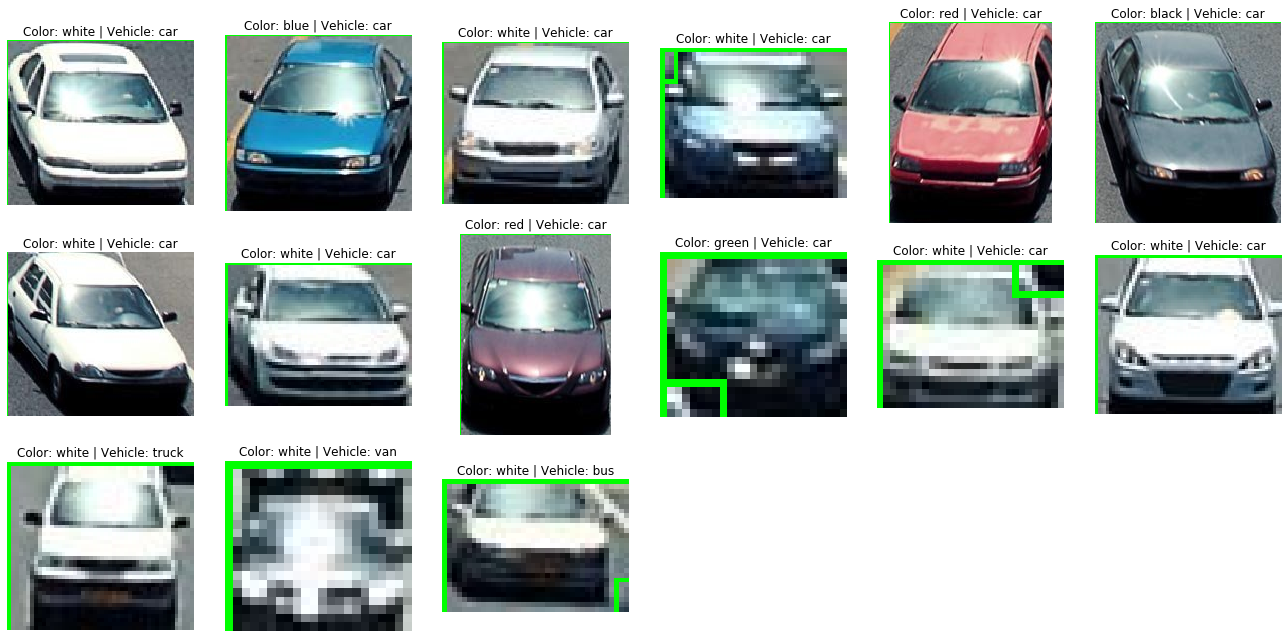

In [7]:
# Vehicle Detection
car_id= 0
for detection in VD_out.reshape(-1, 7):
    confidence = float(detection[2])
    xmin = int(detection[3] * highway.shape[1])
    ymin = int(detection[4] * highway.shape[0])
    xmax = int(detection[5] * highway.shape[1])
    ymax = int(detection[6] * highway.shape[0])
    
    if confidence > 0.4:
        cv2.rectangle(highway, (xmin, ymin), (xmax, ymax), color=(0, 255, 0))
        car_crop = highway[ymin:ymax,xmin:xmax]

        VA_blob = cv2.dnn.blobFromImage(car_crop,size = (72,72))
        vehicle_attribute.setInput(VA_blob)
        VA_out = vehicle_attribute.forward(["color","type"])
        
        color = color_label[np.argmax(VA_out[0])]
        vehicle = type_lablel[np.argmax(VA_out[1])]
        
        ax = plt.subplot(rows, columns, car_id + 1)
        ax.set_title("Color: {} | Vehicle: {}".format(color, vehicle))

        car_crop_rgb = cv2.cvtColor(car_crop,cv2.COLOR_BGR2RGB)

        plt.imshow(car_crop_rgb)
        plt.tight_layout()
        plt.axis("off")
        car_id += 1    
        cv2.imwrite("highway_detection.png",highway)